In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load and Explore the Dataset

In [ ]:
dataset = pd.read_csv("/content/googleplaystore (3).csv")

# Step 2: Data Cleaning:

**1. Convert data types for better analysis.**

In [ ]:
print(dataset.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace("Free", "0")

In [ ]:
dataset['Installs'] = dataset['Installs'].str.replace(r"[+,]", "", regex=True).astype(float)

In [ ]:
dataset['Price'] = pd.to_numeric(dataset['Price'], errors='coerce') # converted into numeric

In [ ]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'], errors='coerce') #converted into date type

**2. Handle missing values.**

In [ ]:
dataset.isna().sum()  #count missing data

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
dataset['Rating'] = dataset['Rating'].fillna(dataset['Rating'].median())


In [ ]:
dataset['Price'].fillna(dataset['Rating'].median()) #filled null values with median

,Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10836,0.0
10837,0.0
10838,0.0
10839,0.0


In [ ]:
mode_cversion = dataset['Current Ver'].mode()[0] #find most frequency in current version column

In [ ]:
# Finding the mode (most frequent value) for 'Android Ver' column
mode_andr_version = dataset['Android Ver'].mode()[0]

# Filling missing values in 'Current Ver' with the mode of 'Current Ver' column
dataset['Current Ver'] = dataset['Current Ver'].fillna(mode_andr_version)
dataset['Android Ver'].fillna(mode_andr_version) # filled missing values with most frequency column

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
...,...
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device


In [ ]:
# Fill missing values in 'Content Rating' with its most frequent value (mode)
mode_content_rating = dataset['Content Rating'].mode()[0]
dataset['Content Rating'] = dataset['Content Rating'].fillna(mode_content_rating)

# Fill missing values in 'Type' with its most frequent value (mode)
dataset['Type'] = dataset['Type'].fillna(dataset['Type'].mode()[0])

# Fill missing values in 'Last Updated' with its most frequent value (mode)
dataset['Last Updated'] = dataset['Last Updated'].fillna(dataset['Last Updated'].mode()[0])


In [ ]:
dataset.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


***3. Remove duplicates***

In [ ]:
dataset.duplicated().sum() #gives number of duplicate data

np.int64(483)

In [ ]:
dataset =dataset.drop_duplicates(keep="first") # keep the first occurrence

In [ ]:
dataset.duplicated().sum() #check its all clear now

np.int64(483)

In [ ]:
dataset.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,float64
Type,object
Price,float64
Content Rating,object
Genres,object


**4. Detect Outliers and Remove Them**

In [ ]:
dataset.describe()

,Rating,Installs,Price,Last Updated
count,10357.000000,1.035700e+04,10357.000000,10357
mean,4.203737,1.415776e+07,0.317611,2017-11-14 09:25:19.320266496
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,1.000000e+09,4.300000,2018-08-08 00:00:00
std,0.485594,8.023955e+07,1.124710,NaN


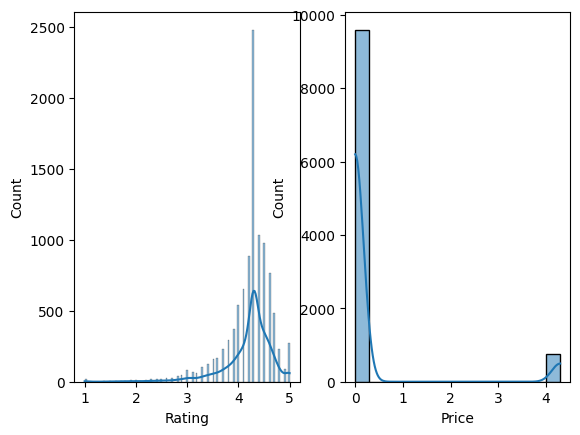

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(dataset['Rating'], kde=True)  # `kde=True` to replicate distplot behavior

plt.subplot(1, 2, 2)
sns.histplot(dataset['Price'], kde=True)


plt.show()

<Axes: ylabel='Rating'>

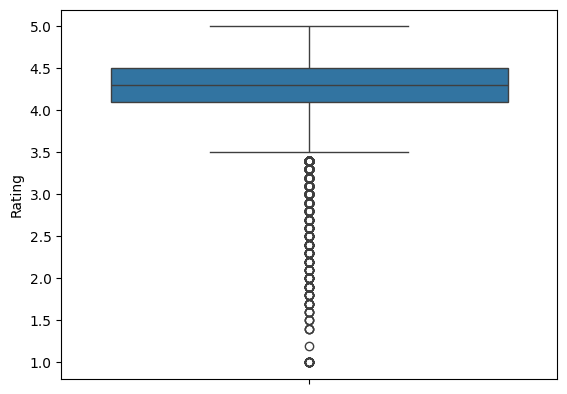

In [ ]:
sns.boxplot(dataset["Rating"]) # viewing outlier using boxplot for more clarity

<Axes: ylabel='Price'>

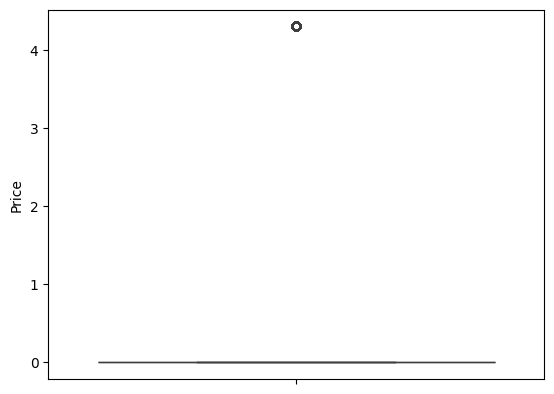

In [ ]:
sns.boxplot(dataset['Price'])

Lets understand and handle RATING column first for Outlier detection

In [ ]:
(dataset['Rating']>5).sum() # only one value is greater than 5 and its outlier, we will remove it

np.int64(1)

In [ ]:
dataset = dataset[dataset["Rating"] <= 5]

In [ ]:
dataset['Rating'].describe()

,Rating
count,10357.000000
mean,4.203737
std,0.485594
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


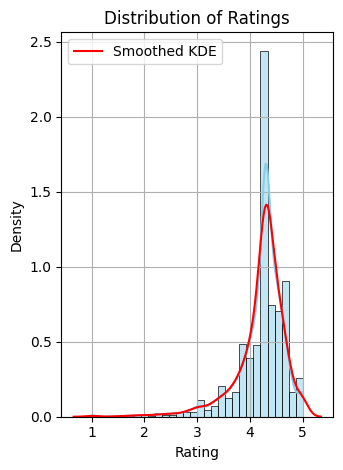

In [ ]:
plt.subplot(1, 2, 1)

# Histogram + KDE (density-based)
sns.histplot(dataset['Rating'], kde=True, stat="density", bins=30, color='skyblue')

# Optional: Smoother KDE overlay
sns.kdeplot(dataset['Rating'], bw_adjust=1.5, color='red', label='Smoothed KDE')

# Labels and title
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Distribution of Ratings")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
dataset['Rating'].describe()

,Rating
count,10357.000000
mean,4.203737
std,0.485594
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


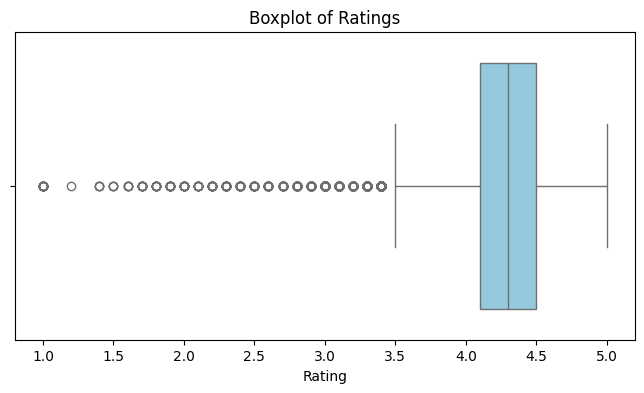

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset["Rating"], color="skyblue")
plt.title("Boxplot of Ratings")
plt.show()

# Now understand the PRICE column for Outlier detection

In [ ]:
dataset['Price'].describe()

,Price
count,10357.000000
mean,0.317611
std,1.124710
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.300000


# Capping Outliers using Percentile

In [ ]:
upper_cap = dataset["Price"].quantile(0.95)  # Set upper limit at 95th percentile
dataset["Price"] = dataset["Price"].clip(upper=upper_cap)  # Cap values above 95th percentile

In [ ]:
dataset['Price'].describe()

,Price
count,10357.000000
mean,0.317611
std,1.124710
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.300000


# Step 3. Business Questions for Analysis

**1. Univariate Analysis (Non-Graphical)**

**Q1: What is the average rating of apps on the Play Store?**

In [ ]:
avg_rating =dataset['Rating'].mean()
print(f"average rating of apps on the Play Store : {avg_rating:.2f}")

average rating of apps on the Play Store : 4.20


**Q2: What percentage of apps are free vs paid?**

In [ ]:
free_apps = dataset[dataset["Type"] == "Free"].shape[0]
paid_apps = dataset[dataset["Type"] == "Paid"].shape[0]
total_apps = dataset.shape[0]

free_percentage = (free_apps / total_apps) * 100
paid_percentage = (paid_apps / total_apps) * 100

print(f"Free Apps: {free_percentage:.2f}%")
print(f"Paid Apps: {paid_percentage:.2f}%")

Free Apps: 92.61%
Paid Apps: 7.39%


**Q3: What is the most common app category?**

In [ ]:
most_common_category = dataset["Category"].value_counts()
most_common_category

,count
Category,
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


In [ ]:
most_common_category = dataset["Category"].value_counts().idxmax()
print(f"The most common category is : {most_common_category}")

The most common category is : FAMILY


**2. Univariate Visualizations (Categorical Variables)**

**Q4: Which app category has the highest number of apps?**

<ipython-input-36-a4cd7ac2dc8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index , y=top_categories.values, palette='dark')


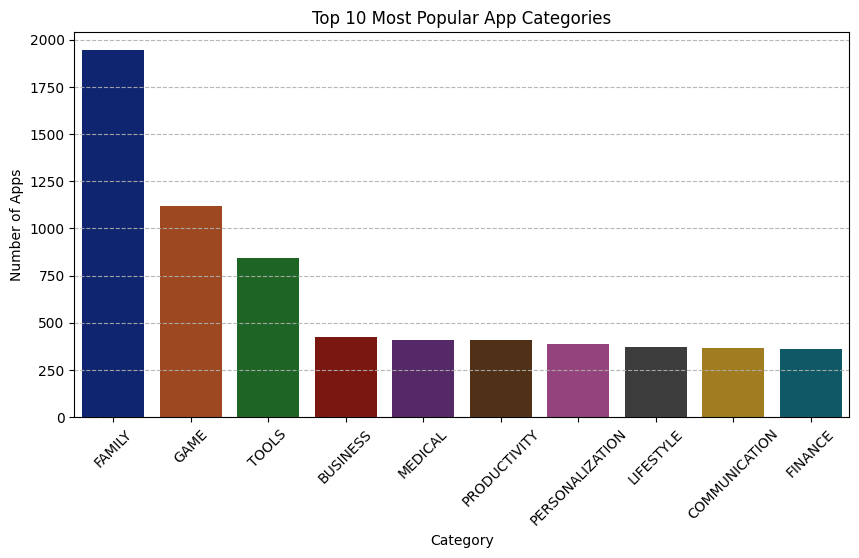

In [ ]:
plt.figure(figsize=(10,5))

# Get the top 10 categories before plotting
top_categories = dataset["Category"].value_counts().head(10)

sns.barplot(x=top_categories.index , y=top_categories.values, palette='dark')
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular App Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

**Q5: What is the distribution of content ratings?**

<ipython-input-37-b4936c15154f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_rating_counts.index ,y=content_rating_counts.values,palette='deep')


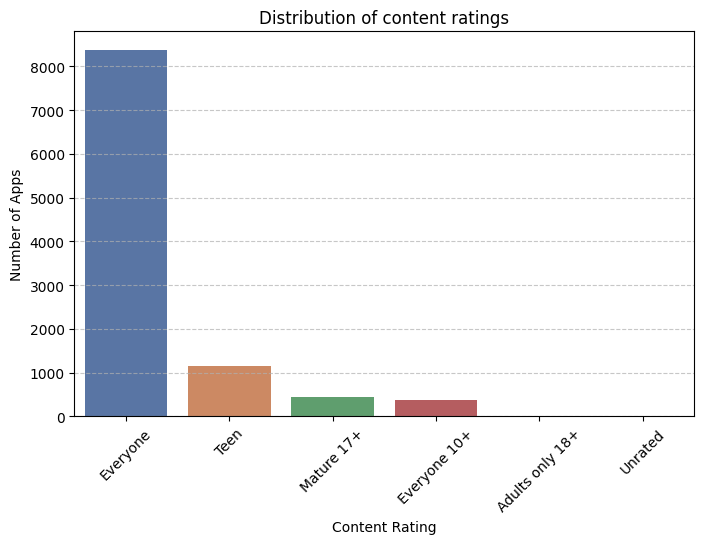

In [ ]:
content_rating_counts = dataset["Content Rating"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=content_rating_counts.index ,y=content_rating_counts.values,palette='deep')
plt.title("Distribution of content ratings")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() #The "Everyone" rating is the most common.

**Q6: How many apps belong to the top 5 most popular categories?**

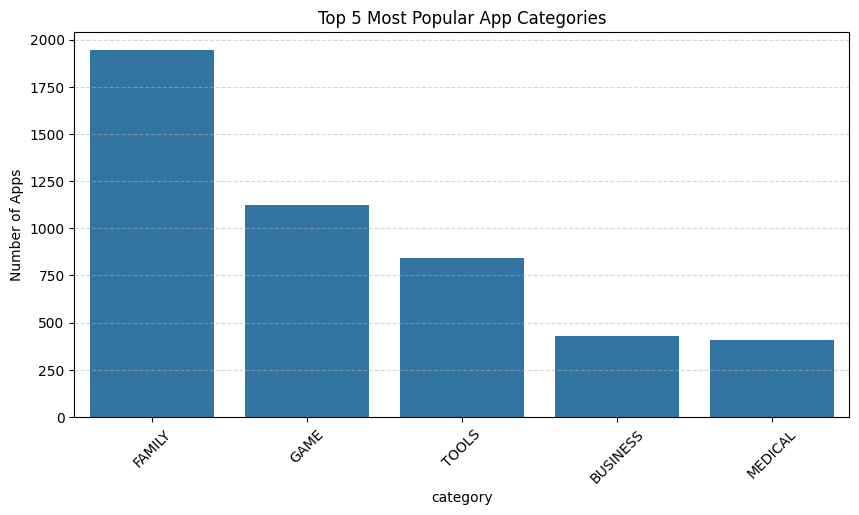

In [ ]:
category_counts = dataset["Category"].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x =category_counts.index, y=category_counts.values,palette='muted')
plt.xticks(rotation=45)
plt.title("Top 5 Most Popular App Categories")
plt.xlabel("category")
plt.ylabel("Number of Apps")
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

**3. Univariate Visualizations (Numerical Variables)**

**Q7: What is the most common rating given to apps?**

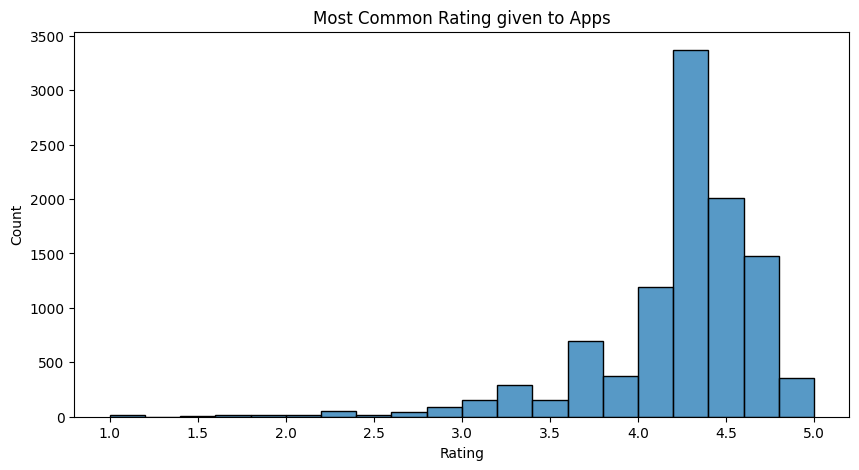

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['Rating'],bins=20)
plt.title("Most Common Rating given to Apps")
plt.show()

**Q8: How are app prices distributed?**

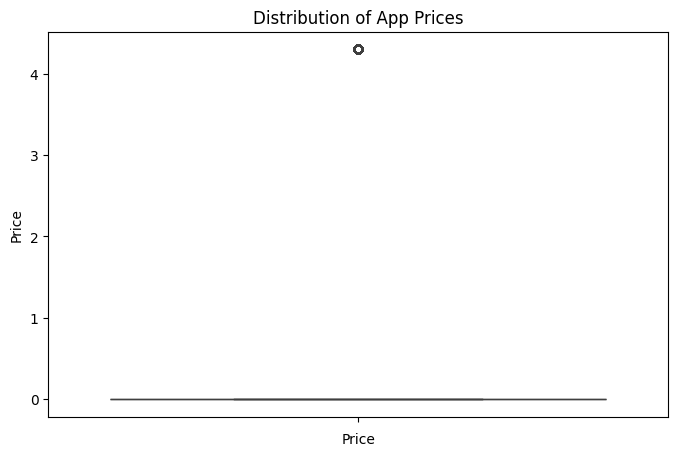

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(dataset["Price"])
plt.title("Distribution of App Prices")
plt.xlabel("Price")
plt.show() #Most apps are free or cheap.

**4. Bivariate Analysis (Numerical vs Categorical)**

**Q9: Do free apps have better ratings than paid apps?**

In [ ]:
free_avg_rating = dataset[dataset["Type"] == "Free"]["Rating"].mean()
paid_avg_rating = dataset[dataset["Type"] == "Paid"]["Rating"].mean()

print(f"Average Rating (Free Apps): {free_avg_rating:.2f}")
print(f"Average Rating (Paid Apps): {paid_avg_rating:.2f}")

Average Rating (Free Apps): 4.20
Average Rating (Paid Apps): 4.27


**Q10: Which app categories have the highest average ratings?**

In [ ]:
category_avg_rating = dataset.groupby("Category")["Rating"].mean().sort_values(ascending=False)
print(category_avg_rating.head(10)) #The highest-rated categories are "Events" and "Education".

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64


**5. Bivariate Visualizations (Numerical vs Numerical)**

**Q11: Does a higher number of installs correlate with higher ratings?**

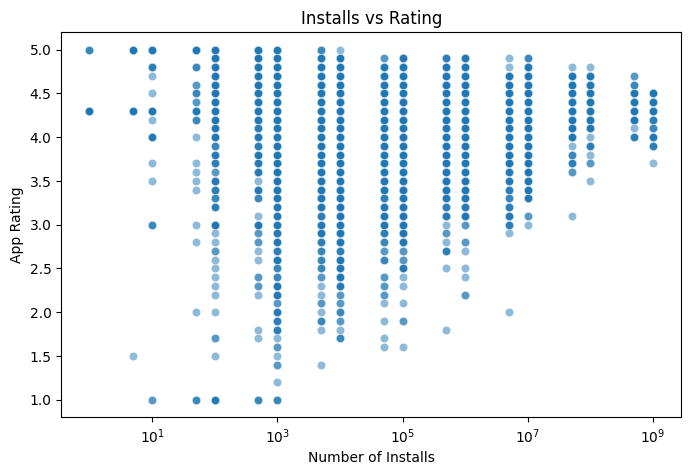

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Installs"], y=dataset["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Installs vs Rating")
plt.xlabel("Number of Installs")
plt.ylabel("App Rating")
plt.show() #No strong correlation between installs and ratings.

**Q12: Do paid apps generate more installs than free apps?**

In [ ]:
free_installs = dataset[dataset["Type"] == "Free"]["Installs"].mean()
paid_installs = dataset[dataset["Type"] == "Paid"]["Installs"].mean()

print(f"Average Installs (Free Apps): {free_installs:.2f}")
print(f"Average Installs (Paid Apps): {paid_installs:.2f}") #Free apps get significantly more installs.

Average Installs (Free Apps): 15279679.80
Average Installs (Paid Apps): 90491.35


**Q13: Are expensive apps rated higher than free apps?**

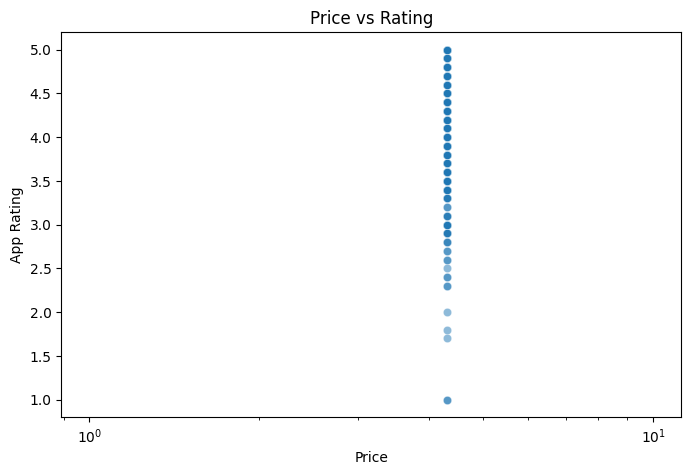

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["Price"], y=dataset["Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("App Rating")
plt.show()

**6. Bivariate Visualizations (Categorical vs Categorical)**

**Q14: Which categories have the most paid apps?**

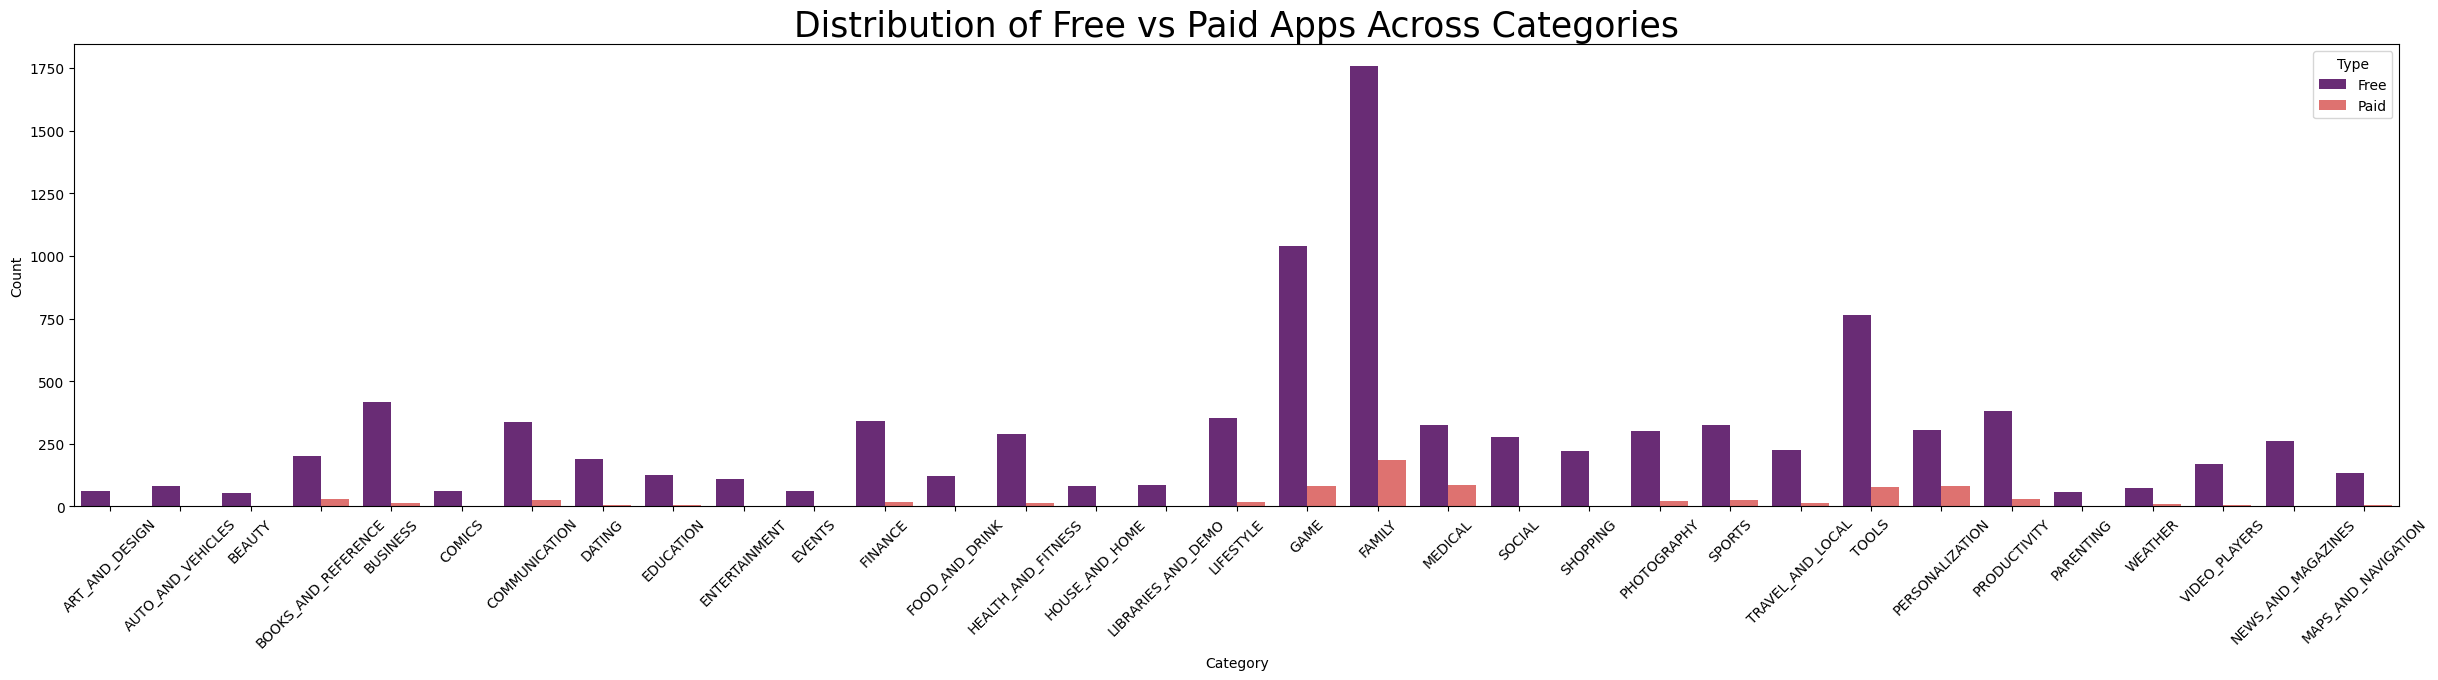

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x="Category", hue="Type", data=dataset, palette="magma")
plt.xticks(rotation=45)
plt.title("Distribution of Free vs Paid Apps Across Categories", fontsize=25)
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show() #Games,medical and Family have the most paid apps.